In [1]:
# I first import all the necessary modules

%matplotlib inline

import os
import random

import imageio
import pandas as pd
from scipy.misc import imread

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Then I loaded the csv files, so that it would be easier to locate the files

root_dir = os.path.abspath('.')
data_dir = '/Users/Rene Dena/Downloads/Machine_Learning_Project_II/TaskI/all'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

Image Name:  train_10253.jpg
Age:  29


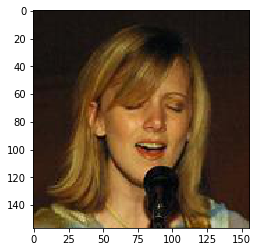

In [3]:
# Then I wrote a code snippet script to randomly choose an image and printed it just to make sure directory was working properly
# I aslo did this so i can randomly view the dataset and check what problems i could possibly face when building the model

i = random.choice(train.index)

img_name = train.Id[i]
print('Image Name: ', img_name)
img = imageio.imread(os.path.join(data_dir, 'train', img_name))

print('Age: ', train.Age[i])

imgplot = plt.imshow(img)

# When running the snippet multiple times, i see that probable problems of which may arise are:
# Variation in shape: One image may have shape (x, y) whereas others may have (x, y, z)
# Multiple viewpoints: Full front view vs side view
# Quality of images: Some images were found to be highly pixelated.
# Discrepancy in brightness and contrast: Some are were taken in darker light than others

# Of all the probable issue, i first focus on the Variation of Shapes issue.

In [4]:
# I did this by simply resizing the image.
# I loaded all the images and resized them into a single numpy array(Also allows for easier data manipulation)

from scipy.misc import imresize
import skimage.transform

# Train Data Size: 28360
# Second Rezising Train Images

temp = []
for img_name in train.Id:
    img_path = os.path.join(data_dir, 'train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help in later stage
    if len(img.shape) == 3 and img.shape[-1] == 3: # only append if 3D and last dimension is a 3, standing for RGB
        temp.append(img)
    else: # if a 2D shape(gray scale) the transform into a 3D shape then append
        img = imageio.imread(img_path)
        img = skimage.transform.resize(img, (32, 32, 3), mode='constant')
        img = img.astype('float32') # again, this will help in later stage
        temp.append(img)
train_x = np.stack(temp)
print("\n\n\nLength of Temp List: ", len(temp))
print('test x shape:', train_x.shape)

C:\Users\Rene Dena\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
C:\Users\Rene Dena\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
C:\Users\Rene Dena\Anaconda3\envs\py36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "





Length of Temp List:  28360
test x shape: (28360, 32, 32, 3)


In [5]:
# Test Data Size: 7090
# First Rezising Test Images

temp = []
for img_name in test.Id:
    img_path = os.path.join(data_dir, 'test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help in later stage
    if len(img.shape) == 3 and img.shape[-1] == 3:  # only append if 3D and last dimension is a 3, standing for RGB
        temp.append(img)
    else: # if a 2D shape(gray scale) the transform into a 3D shape then append
        img = imageio.imread(img_path)
        img = skimage.transform.resize(img, (32, 32, 3), mode='constant')
        img = img.astype('float32') # this will help in later stage
        temp.append(img)
test_x = np.stack(temp)
print("\n\n\nLength of Temp List: ", len(temp))
print('test x shape:', test_x.shape)

C:\Users\Rene Dena\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
C:\Users\Rene Dena\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
C:\Users\Rene Dena\Anaconda3\envs\py36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "





Length of Temp List:  7090
test x shape: (7090, 32, 32, 3)


In [6]:
# Above firstly rezising all dataset images into common shape (32, 32, 3), i then implemented short code that will help me build a better model
# This was of course normalizing the dataset images to make the training fater

train_x = train_x / 255.
test_x = test_x / 255.

In [7]:
# Next, i had a look at our target variable. 
# This also helped me see what was the distribution of classes in our data.

train.Age.value_counts(normalize=True)

# As you can see, after running this snippet, we find that the average age in our for our dataset is 24-26(Mid twenties) with Age: 26 producing a score of 0.039492. 

26      0.039492
24      0.039210
25      0.038858
27      0.038752
23      0.038188
22      0.036495
28      0.034520
29      0.033533
21      0.030078
30      0.028561
31      0.026869
20      0.026164
32      0.024330
33      0.022320
35      0.020592
34      0.020169
19      0.019852
36      0.019217
38      0.016749
37      0.016326
40      0.015691
41      0.015268
39      0.014915
18      0.014669
43      0.014563
42      0.014528
47      0.014210
45      0.014175
49      0.014175
44      0.013963
          ...   
111     0.000071
119     0.000071
5       0.000071
113     0.000071
109     0.000071
136     0.000071
110     0.000071
6       0.000071
101     0.000071
141     0.000035
429     0.000035
125     0.000035
124     0.000035
1996    0.000035
112     0.000035
176     0.000035
256     0.000035
268     0.000035
212     0.000035
108     0.000035
139     0.000035
250     0.000035
585     0.000035
185     0.000035
152     0.000035
104     0.000035
103     0.000035
114     0.0000

In [8]:
# From this, i figured i could already submit a first submission. 
# I seen that most of the dataset images were of age 26.
# From that, i was able to say that all the people in our test dataset were of age 26! :D

test['Age'] = '26'
test.to_csv('My Predictions I.csv', index=False)

# I then uploaded this file and got my first results.

In [9]:
# Now it was time to build a real better model

# Before creating something substantial, i brought my target variable in shape.
# I converted our target into dummy columns so that it will be easier for my model to ingest it.

import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Age)
train_y = keras.utils.np_utils.to_categorical(train_y)

print('train x shape:', train_x.shape)
print('train y shape:', train_y.shape)

Using TensorFlow backend.


train x shape: (28360, 32, 32, 3)
train y shape: (28360, 127)


In [10]:
# NOW CAME THE MAIN PART of building a model
# As the problem is related to image processing, personally felt it was wise to use neural networks to solve the problem.
# For this reason, i then planned to build a simple feedforward neural network for this problem.

# First i specified all the parameters i would be using in my neural network architecture

# Number of neurons in each layer

input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 127

# I set remaining variables

epochs = 10
batch_size = 128

In [11]:
# Then i imported all the necessary keras modules

from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [12]:
# After that, I defined my network

model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(input_shape=(32,32,3),units=output_num_units, activation='softmax'),
])

In [13]:
# To see how my model would look like; I then printed it:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 127)               63627     
Total params: 1,600,127
Trainable params: 1,600,127
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Now I compile my neural network and let it train for a while

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/10
28360/28360 [==============================] - 3s 112us/step - loss: 4.2639 - acc: 0.0377
Epoch 2/10
28360/28360 [==============================] - 3s 104us/step - loss: 4.1378 - acc: 0.0399
Epoch 3/10
28360/28360 [==============================] - 3s 102us/step - loss: 4.1116 - acc: 0.0414
Epoch 4/10
28360/28360 [==============================] - 3s 103us/step - loss: 4.0936 - acc: 0.0421
Epoch 5/10
28360/28360 [==============================] - 3s 103us/step - loss: 4.0781 - acc: 0.0444
Epoch 6/10
28360/28360 [==============================] - 3s 103us/step - loss: 4.0662 - acc: 0.0452
Epoch 7/10
28360/28360 [==============================] - 3s 100us/step - loss: 4.0537 - acc: 0.0475
Epoch 8/10
28360/28360 [==============================] - 3s 98us/step - loss: 4.0433 - acc: 0.0506
Epoch 9/10
28360/28360 [==============================] - 3s 98us/step - loss: 4.0341 - acc: 0.0497
Epoch 10/10
28360/28360 [==============================] - 3s 101us/step - loss: 4.0238 - acc

In [15]:
# Though training, i have yet to validate it. 
# Validation is necessary if I want to ensure that my model will perform well on both the data it is training on and on a new testing data

# I tweaked the code a little bit to cross validate it.

model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 22688 samples, validate on 5672 samples
Epoch 1/10
22688/22688 [==============================] - 2s 107us/step - loss: 4.0142 - acc: 0.0516 - val_loss: 4.0280 - val_acc: 0.0483
Epoch 2/10
22688/22688 [==============================] - 2s 104us/step - loss: 4.0055 - acc: 0.0548 - val_loss: 4.0628 - val_acc: 0.0374
Epoch 3/10
22688/22688 [==============================] - 2s 106us/step - loss: 3.9965 - acc: 0.0580 - val_loss: 4.0256 - val_acc: 0.0450
Epoch 4/10
22688/22688 [==============================] - 2s 105us/step - loss: 3.9890 - acc: 0.0569 - val_loss: 4.0239 - val_acc: 0.0421
Epoch 5/10
22688/22688 [==============================] - 2s 105us/step - loss: 3.9823 - acc: 0.0572 - val_loss: 4.0262 - val_acc: 0.0428
Epoch 6/10
22688/22688 [==============================] - 2s 107us/step - loss: 3.9746 - acc: 0.0595 - val_loss: 4.0401 - val_acc: 0.0400
Epoch 7/10
22688/22688 [==============================] - 2s 109us/step - loss: 3.9685 - acc: 0.0602 - val_loss: 4.0250 - v

In [16]:
# Because the model seemed to perform good for a first model, i then opted to submit the result.

pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

C:\Users\Rene Dena\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
submission = pd.DataFrame({'Id':test['Id'],'Expected':pred})

submission.head()

filename = 'My Predictions II.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: My Predictions II.csv


In [18]:
#  ============================Optimization No I ====================================================================

# Now i decide to use layers for better optimization of my model
# I use the most basic model to process this age prediction. Next, try to optimize from the following perspective:
# 1. Use a better neural network model
# Increase the number of training
# Grayscale the image (because the color of the image is not a particularly important feature for this problem)

# Convolutional neural network

# After adding the convolutional layer, the prediction accuracy rate should increased.
# Filters: Output dimension
# Strides: Convolution step
# Conv2D implimentation now.....

#Parameter initialization

filters = 10
filtersize = (5,5)

epochs = 15
batchsize = 128

input_shape = (32,32,3)

In [19]:
from keras.models import Sequential
model = Sequential()

model.add(keras.layers.InputLayer(input_shape=input_shape))

model.add(keras.layers.convolutional.Conv2D(filters, filtersize, strides=(1, 1), padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=127, input_dim=50,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=epochs, batch_size=batchsize,validation_split=0.3)

model.summary()



Train on 19852 samples, validate on 8508 samples
Epoch 1/15
19852/19852 [==============================] - 9s 445us/step - loss: 4.0923 - acc: 0.0382 - val_loss: 4.0221 - val_acc: 0.0368
Epoch 2/15
19852/19852 [==============================] - 9s 462us/step - loss: 3.9533 - acc: 0.0455 - val_loss: 3.9916 - val_acc: 0.0368
Epoch 3/15
19852/19852 [==============================] - 9s 469us/step - loss: 3.8668 - acc: 0.0551 - val_loss: 4.0072 - val_acc: 0.0396
Epoch 4/15
19852/19852 [==============================] - 9s 466us/step - loss: 3.7751 - acc: 0.0692 - val_loss: 4.0076 - val_acc: 0.0386
Epoch 5/15
19852/19852 [==============================] - 9s 448us/step - loss: 3.6750 - acc: 0.0854 - val_loss: 4.0559 - val_acc: 0.0400
Epoch 6/15
19852/19852 [==============================] - 9s 439us/step - loss: 3.5833 - acc: 0.1005 - val_loss: 4.0802 - val_acc: 0.0368
Epoch 7/15
19852/19852 [==============================] - 9s 437us/step - loss: 3.4942 - acc: 0.1183 - val_loss: 4.1230 - v

In [20]:
#  ============================Optimization No II ====================================================================
# I now increase the number of layers in the neural network
filters1=50
filters2=100
filters3=100

filtersize = (5,5)

epochs = 15
batchsize= 128

input_shape = (32,32,3)

In [21]:
from keras.models import Sequential

model = Sequential()

model.add(keras.layers.InputLayer(input_shape=input_shape))

model.add(keras.layers.convolutional.Conv2D(filters1, filtersize, strides=(1, 1), padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.convolutional.Conv2D(filters2, filtersize, strides=(1, 1), padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.convolutional.Conv2D(filters3, filtersize, strides=(1, 1), padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=127, input_dim=50,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=epochs, batch_size=batchsize,validation_split=0.3)
model.summary()


Train on 19852 samples, validate on 8508 samples
Epoch 1/15
19852/19852 [==============================] - 30s 1ms/step - loss: 4.1282 - acc: 0.0385 - val_loss: 4.0305 - val_acc: 0.0409
Epoch 2/15
19852/19852 [==============================] - 29s 1ms/step - loss: 4.0151 - acc: 0.0432 - val_loss: 4.0060 - val_acc: 0.0410
Epoch 3/15
19852/19852 [==============================] - 29s 1ms/step - loss: 3.9705 - acc: 0.0430 - val_loss: 3.9770 - val_acc: 0.0403
Epoch 4/15
19852/19852 [==============================] - 29s 1ms/step - loss: 3.9258 - acc: 0.0453 - val_loss: 3.9396 - val_acc: 0.0395
Epoch 5/15
19852/19852 [==============================] - 29s 1ms/step - loss: 3.8915 - acc: 0.0461 - val_loss: 3.9475 - val_acc: 0.0401
Epoch 6/15
19852/19852 [==============================] - 29s 1ms/step - loss: 3.8617 - acc: 0.0506 - val_loss: 3.9235 - val_acc: 0.0380
Epoch 7/15
19852/19852 [==============================] - 29s 1ms/step - loss: 3.8238 - acc: 0.0580 - val_loss: 3.9143 - val_acc:

In [22]:
# Output result

pred=model.predict_classes(test_x)
pred=lb.inverse_transform(pred)
print(pred)
test['Age']=pred
test.to_csv('My Predictions III.csv',index=False)

[25 26 40 ... 20 28 26]


C:\Users\Rene Dena\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Image Name:  train_8509.jpg
Original Age: 18 Predicted Age: 18


C:\Users\Rene Dena\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


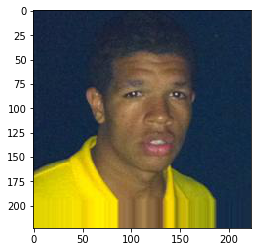

In [23]:
# For gags, i then compare with that of the train too see how well my models predictions are:

i = random.choice(train.index)
img_name = train.Id[i]
print('Image Name: ', img_name)
img = imageio.imread(os.path.join(data_dir, 'train', img_name))

imgplot = plt.imshow(img)

pred = model.predict_classes(train_x)
print('Original Age:', train.Age[i], 'Predicted Age:', lb.inverse_transform(pred[i]))